<a href="https://colab.research.google.com/github/tcardlab/optimus_bind_sample/blob/master/notebooks/2_0_TJC_openmm_and_viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenMM

In [5]:
#DOCS: http://openmm.org/

#Install Instructions:
#https://rjai.me/posts/google-colab-conda/
!wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh && bash Anaconda3-5.2.0-Linux-x86_64.sh -bfp /usr/local
  
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
#this will take a bit...

--2019-05-03 16:56:13--  https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651745206 (622M) [application/x-sh]
Saving to: ‘Anaconda3-5.2.0-Linux-x86_64.sh.1’

Anaconda3-5.2.0-Lin 100%[===================>] 621.55M  67.3MB/s    in 8.6s    

2019-05-03 16:56:22 (72.2 MB/s) - ‘Anaconda3-5.2.0-Linux-x86_64.sh.1’ saved [651745206/651745206]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: blas-1.0-mkl ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-8 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libgfortran-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: bzip2-

In [0]:
!conda install -y -q -c conda-forge -c omnia/label/cuda100 -c omnia openmmtools

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - openmmtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mdtraj-1.9.2               |   py36h447964c_0         5.9 MB  conda-forge
    parmed-3.2.0               |           py36_0         1.1 MB  omnia
    cftime-1.0.3.4             |   py36h7eb728f_0         1.1 MB  conda-forge
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge
    openmm-7.3.1               |py36_cuda100_rc_2        11.4 MB  omnia/label/cuda100
    conda-4.6.14               |           py36_0         2.1 MB  conda-forge
    hdf4-4.2.13                |                0         969 KB  conda-forge
    netcdf4-1.4.1              | py36ha292673_200         1.9 MB  conda-forge
    fftw3f-3.3.4               |                2         1.2 MB  omnia/label/cuda100
 

In [0]:
#Edit> Notebook Settings> Hardware=GPU #neccesary for 3td test
!python -m simtk.testInstallation

There are 4 Platforms available:

1 Reference - Successfully computed forces
2 CPU - Successfully computed forces
3 CUDA - Successfully computed forces
4 OpenCL - Successfully computed forces

Median difference in forces between platforms:

Reference vs. CPU: 6.29169e-06
Reference vs. CUDA: 6.73398e-06
CPU vs. CUDA: 7.74835e-07
Reference vs. OpenCL: 6.75426e-06
CPU vs. OpenCL: 8.17009e-07
CUDA vs. OpenCL: 2.21126e-07


In [0]:
#opengl rendering?
#https://pymol.org/dokuwiki/doku.php?id=rendering

# PDB Fixer

In [0]:
#http://htmlpreview.github.io/?https://raw.github.com/pandegroup/pdbfixer/master/Manual.html
!pip install git+https://github.com/pandegroup/pdbfixer.git

In [0]:
from pdbfixer import PDBFixer
from simtk.openmm.app import PDBFile

fixer = PDBFixer(filename='1a4y.pdb') #uploaded file manually
fixer.findMissingResidues()
fixer.findMissingAtoms()
fixer.addMissingAtoms()
PDBFile.writeFile(fixer.topology, fixer.positions, open('output.pdb', 'w'))

# Viewer

## pyball (Xdisplay failure)

In [0]:
#build for 2.7 so we need to update:
!git clone https://github.com/boscoh/pyball.git

for i in ['pyball.py','render.py','spacehash.py']:
  path = 'pyball/'+i
  !2to3 -w $path
  


In [0]:
!pip install numpy vispy msgpack
!conda install pyopengl
from OpenGL.GL import * 
import vispy

In [0]:
#!rm -rf pdbremix
#!rm -rf pdbremix.egg-info dist build

%cd ../usr/local/lib/python3.6/site-packages
!rm -rf pdbremix
!git clone https://github.com/tcardlab/pdbremix.git
!2to3 --output-dir=pdbremix -W -n pdbremix
!python pdbremix/setup.py install
%cd /content

#!pip install git+https://github.com/tcardlab/pdbremix.git

In [0]:
!pip install matplotlib==2.1.2
!python pyball/pyball.py 1a4y.pdb

UsageError: Line magic function `%export` not found.


## MDTraj 1.7.2(old) for mdtraj.html (IDK no err)

In [0]:
#http://mdtraj.org/1.7.2/installation.html
!pip install mdtraj==1.7.2

    100% |████████████████████████████████| 19.0MB 2.2MB/s 
  Running setup.py bdist_wheel for mdtraj ... done
  Stored in directory: /root/.cache/pip/wheels/6c/fc/03/7c8bdb57df60e8fb5547b1552fa6852c753ea3c56b91143b96
Successfully built mdtraj


In [0]:
#https://www.youtube.com/watch?time_continue=3&v=Lwy2Hdsr518
import mdtraj as md
traj = md.load_pdb("http://files.rcsb.org/view/2M6K.pdb")
print(traj)

<mdtraj.Trajectory with 30 frames, 4462 atoms, 292 residues, without unitcells>


/usr/local/lib/python3.6/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [0]:
from mdtraj.html import TrajectoryView, enable_notebook
enable_notebook()

<IPython.core.display.Javascript object>

In [0]:
TrajectoryView(traj, secondaryStructure='ribbon')

#no errors... but no display either...

TrajectoryView(secondaryStructure='ribbon')

## NGLView–Requires IPyWidgets(unsupported)

In [0]:
#GIT – https://github.com/arose/nglview
#DOCS – http://nglviewer.org/nglview/latest/api.html

#Works fantastically in other notebooks:
#http://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html

'''
nv.show_pytraj(traj) serves an html script to iframe. 
  from IPython.display import IFrame
  IFrame(src="view.html", width=700, height=700)

might be able to mod it with code snippets
see here:  https://github.com/arose/nglview/blob/ce9590895e9631225f72494f68f3db681daf2c3b/nglview/widget.py#L58
and here:  https://github.com/arose/nglview/blob/master/nglview/show.py#L205
'''


In [0]:
!conda install nglview -c conda-forge
!pip install pytraj

In [0]:
import warnings
warnings.filterwarnings('ignore') # make the notebook nicer
from __future__ import print_function

import pytraj as pt
import nglview as nv

print("nglview version = {}".format(nv.__version__))
print("pytraj version = {}".format(pt.__version__))

nglview version = 1.2.1
pytraj version = 2.0.4


In [0]:
traj = pt.load('1A4Y.pdb')
#view = nv.show_pytraj(traj) #breaks runtime...

## OpenGL PDB–>OBJ

In [6]:
#ignore sloppy attempts
'''
#From compressed, probably works alright
!wget https://pymol.org/installers/PyMOL-2.3.1_75-Linux-x86_64-py37.tar.bz2
!tar -xjf PyMOL-2.3.1_75-Linux-x86_64-py37.tar.bz2
%cd /content/pymol
!ls
!./pymol
%cd /content
'''

'''
#MANUAL install- works from terminal, but ipython cant find it...
!sudo apt-get install libglew-dev
!sudo apt-get install libglm-dev

#!export PATH= $HOME/.local/bin:$PATH
!env PATH=$HOME/.local/bin:$PATH
!git clone https://github.com/schrodinger/pymol-open-source.git
%cd pymol-open-source
!prefix=$HOME/pymol-open-source-build
!python setup.py build install \
    --home=$prefix
%cd /content

#!HOME/pymol-open-source-build/bin/pymol
!/bin/pymol
'''

#libxml2 (optional, for COLLADA export, disable with --no-libxml) ****
!conda install -c schrodinger pymol
!/usr/local/bin/pymol
!pymol --help

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
qt.qpa.screen: QXcbConnection: Could not connect to display 
Could not connect to any X display.
PyMOL 2.3.1 Incentive Product
Copyright (C) Schrodinger, LLC

Usage: pymol [OPTIONS]... [FILES]... [-- CUSTOM SCRIPT ARGUMENTS]

Options

  --help    display this help and exit
  --version display PyMOL version and exit
  --retina  use retina resolution (MacPyMOL) and set display_scale_factor=2
  --nospnav Don't listen to 3Dconnexion SpaceNavigator input
  --gldebug use glDebugMessageCallback for GL debugging
  --tes

In [8]:
# load the pdb files and execte the following commands
!pymol "1a4y.pdb" -d 'as ribbon;spectrum count;set seq_view'

#%cd /content
#from . bin.pymol import cmd

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
qt.qpa.screen: QXcbConnection: Could not connect to display 
Could not connect to any X display.


In [0]:
#DOCS – https://pymol.org/dokuwiki/doku.php
#DOCS – https://pymolwiki.org/index.php/Main_Page
import pymol
from pymol import cmd

#!pymol "1a4y.pdb" -d 'as ribbon;spectrum count;set seq_view'
cmd.load("1a4y.pdb", "structure")
cmd.save("1a4y.obj") #cmd.save("1a4y.wrl") # Supported files – https://pymol.org/dokuwiki/doku.php?id=command:save

Saved to /content/test.png


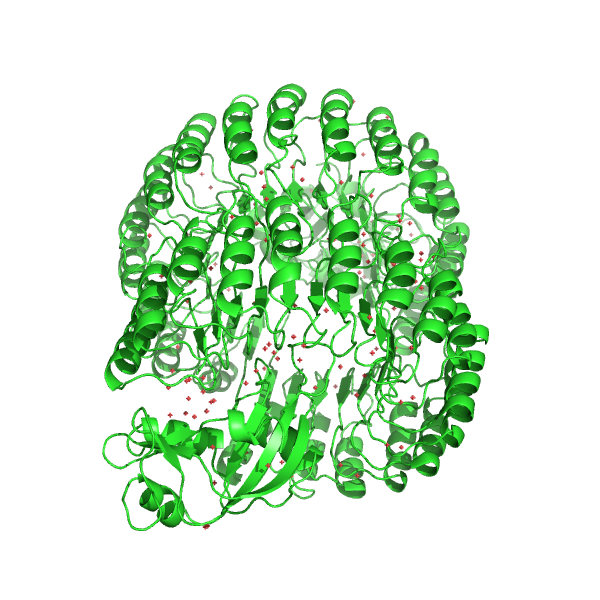

In [11]:
from IPython.display import Image
filename = '/content/test.png'
cmd.zoom()
cmd.png(filename, 600, 600)
try:
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [26]:
!pip uninstall lucid
!pip install git+https://github.com/tcardlab/lucid.git

import PIL.Image
import matplotlib.pylab as pl

from IPython.display import clear_output, display, Image, HTML

from lucid.misc.gl.glcontext import create_opengl_context
import OpenGL.GL as gl

from lucid.misc.gl import meshutil
from lucid.misc.gl import glrenderer
#import lucid.misc.io.showing as show
from lucid.misc.io import load
from lucid.misc.tfutil import create_session

from lucid.modelzoo import vision_models
from lucid.optvis import objectives
from lucid.optvis import param
from lucid.optvis import render as lucid_render
from lucid.optvis.param.spatial import sample_bilinear

Uninstalling lucid-0.3.9:
  Would remove:
    /usr/local/lib/python3.6/site-packages/lucid-0.3.9.dist-info/*
    /usr/local/lib/python3.6/site-packages/lucid/*
Proceed (y/n)? y
  Successfully uninstalled lucid-0.3.9
  Cloning https://github.com/tcardlab/lucid.git to /tmp/pip-req-build-96vd1b_b
  Running setup.py bdist_wheel for lucid ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-c383b82p/wheels/a7/f0/f0/b386a4b0dc4bdcadc2db1a72b3e26a51c0871973a890c6178f
Successfully built lucid
distributed 1.21.8 requires msgpack, which is not installed.


In [27]:
create_opengl_context()
gl.glGetString(gl.GL_VERSION)

b'4.6.0 NVIDIA 410.79'

In [0]:
mesh = meshutil.load_obj('1a4y.obj')
mesh = meshutil.normalize_mesh(mesh)

In [31]:
import lucid.misc.io.showing as show
show.obj(mesh)

AttributeError: ignored

In [123]:
cmd.get_view(output=1,quiet=3)
my_view= cmd.get_view()
print(my_view)
viewp = cmd.viewport(100, 100)
print(viewp)

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -297.59332275390625, 15.88765811920166, 8.713462829589844, 19.968727111816406, 234.62484741210938, 360.5617980957031, -20.0)
None


In [122]:
my_view

(1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -297.59332275390625,
 15.88765811920166,
 8.713462829589844,
 19.968727111816406,
 234.62484741210938,
 360.5617980957031,
 -20.0)